In [10]:
import networkx as nx
import numpy as np
import pandas as pd
from scipy.linalg import svd
import matplotlib.pyplot as plt

In [11]:


def create_directed_smallworld_graph(n=100, k=4, p=0.1):
    # Crea un grafo de mundo pequeño
    G = nx.watts_strogatz_graph(n, k, p)
    
    #Convierte el grafo a un grafo dirigdo aleatoriamente
    directed_G = nx.DiGraph()
    directed_G.add_nodes_from(G.nodes())
    for edge in G.edges():
        if np.random.rand() > 0.5:
            directed_G.add_edge(*edge)
        else:
            directed_G.add_edge(edge[1], edge[0])
    
    return directed_G


# Parametros
n_nodes = 30
k_neighbors = 4
rewire_prob = 0.2
k_components = 5

# Procesamiento 
directed_G = create_directed_smallworld_graph(n_nodes, k_neighbors, rewire_prob)
G = directed_G
adjacency_matrix = nx.to_numpy_array(G, dtype=float)
U, S, Vt = svd(adjacency_matrix, full_matrices=False)
svd_comps = U[:, :k_components] @ np.diag(S[:k_components])

# guarda los dvs en un df
df = pd.DataFrame(svd_comps)

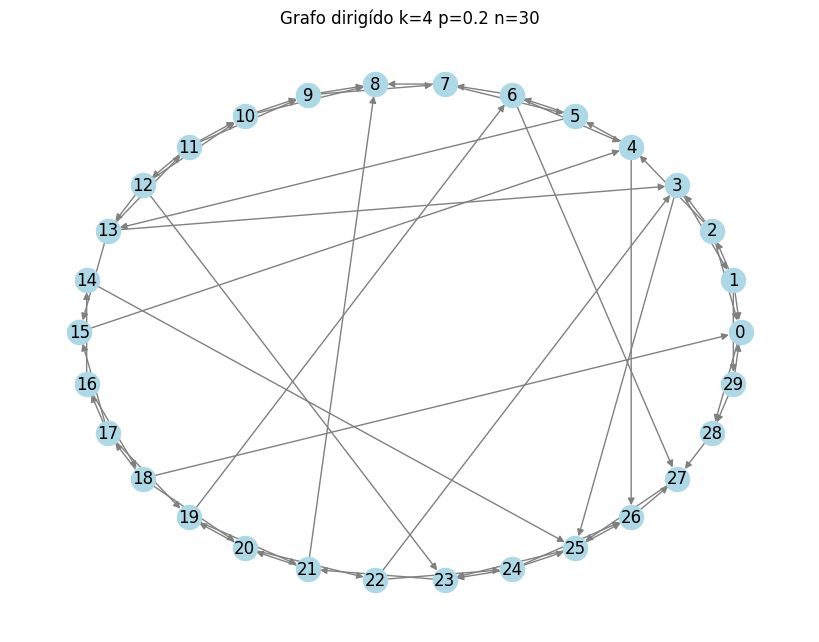

In [12]:
plt.figure(figsize=(8, 6))
#Grafica el grafo dirigido
nx.draw_circular(G, with_labels=True, node_color='lightblue', edge_color='gray', arrows=True)
plt.title(f"Grafo dirigído k={k_neighbors} p={rewire_prob} n={n_nodes}")
plt.show()




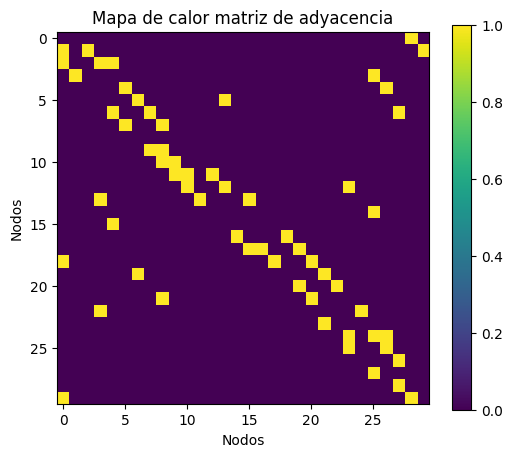

In [13]:
adj_matrix = nx.to_numpy_array(G)

#grafica la mat de ady
plt.figure(figsize=(6, 5))
plt.imshow(adj_matrix, cmap="viridis", interpolation="nearest")
plt.colorbar(label="")
plt.title("Mapa de calor matriz de adyacencia")
plt.xlabel("Nodos")
plt.ylabel("Nodos")
plt.show()

Text(0.5, 1.0, 'Diagrama de dispersión Valor singular ')

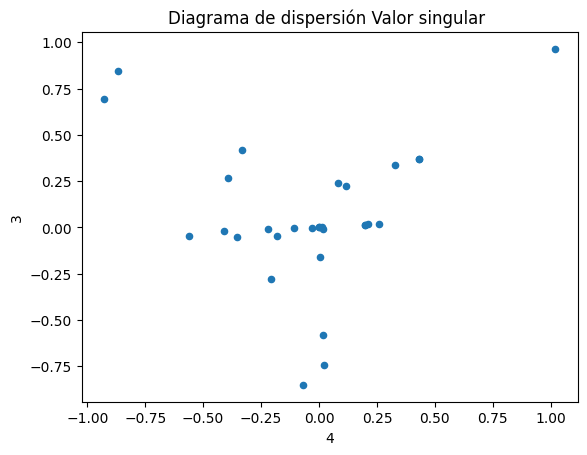

In [15]:
#diagrama de valores singulares 3 y 4
df.plot.scatter(x=4,y=3
       )
plt.title('Diagrama de dispersión Valor singular ')